In [1]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline

# Récupération des données et EDA

In [2]:
import pandas as pd
url = "https://raw.githubusercontent.com/remijul/dataset/master/dolphins.csv"
df = pd.read_csv(url)
df.head()

,variety,area,dimension_1_mm,dimension_2_mm,dimension_3_mm,mass_g,sex
0,Tropicalis,Artic,39.1,18.7,181.0,3750.0,MALE
1,Tropicalis,Artic,39.5,17.4,186.0,3800.0,FEMALE
2,Tropicalis,Artic,40.3,18.0,195.0,3250.0,FEMALE
3,Tropicalis,Artic,NaN,NaN,NaN,NaN,NaN
4,Tropicalis,Artic,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df.shape

(344, 7)

Analyse générale, Prenons connaissance des données

In [4]:
df.describe(include = 'all')

,variety,area,dimension_1_mm,dimension_2_mm,dimension_3_mm,mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Tropicalis,Caraibean,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [5]:
df[df.isnull().any(axis=1)]

,variety,area,dimension_1_mm,dimension_2_mm,dimension_3_mm,mass_g,sex
3,Tropicalis,Artic,NaN,NaN,NaN,NaN,NaN
8,Tropicalis,Artic,34.1,18.1,193.0,3475.0,NaN
9,Tropicalis,Artic,42.0,20.2,190.0,4250.0,NaN
10,Tropicalis,Artic,37.8,17.1,186.0,3300.0,NaN
11,Tropicalis,Artic,37.8,17.3,180.0,3700.0,NaN
47,Tropicalis,Pacific,37.5,18.9,179.0,2975.0,NaN
246,Peale,Caraibean,44.5,14.3,216.0,4100.0,NaN
286,Peale,Caraibean,46.2,14.4,214.0,4650.0,NaN
324,Peale,Caraibean,47.3,13.8,216.0,4725.0,NaN
339,Peale,Caraibean,NaN,NaN,NaN,NaN,NaN


In [6]:
pd.crosstab(df.variety, "freq", normalize=True)

col_0,freq
variety,
Chinensis,0.197674
Peale,0.360465
Tropicalis,0.441860


In [7]:
pd.crosstab(df.area, "freq", normalize=True)

col_0,freq
area,
Artic,0.151163
Caraibean,0.488372
Pacific,0.360465


In [8]:
pd.crosstab(df.sex, "freq", normalize=True)

col_0,freq
sex,
.,0.002994
FEMALE,0.494012
MALE,0.502994


On constate les valeurs null, Maintenant observons la répartition des valeurs numérique, regardons si l'on distingue différents pics

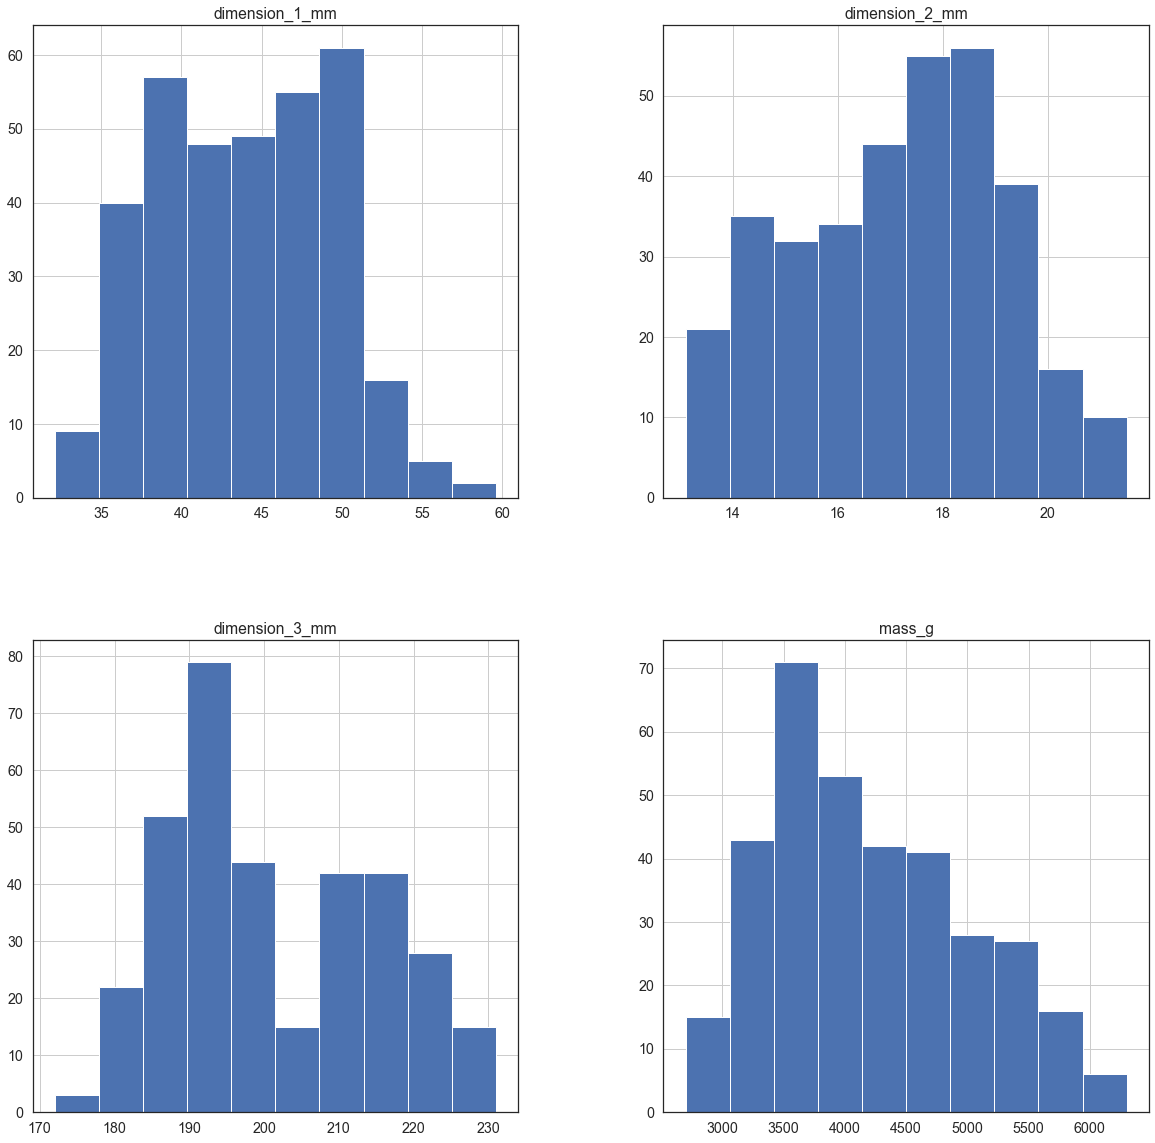

In [9]:
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(20,20)})
ax=df.hist(bins=10 )

Maintenant regardons les valeur entre elle et par rapport à la variety (classe à prédire)

In [10]:
df.corr()

,dimension_1_mm,dimension_2_mm,dimension_3_mm,mass_g
dimension_1_mm,1.000000,-0.235053,0.656181,0.595110
dimension_2_mm,-0.235053,1.000000,-0.583851,-0.471916
dimension_3_mm,0.656181,-0.583851,1.000000,0.871202
mass_g,0.595110,-0.471916,0.871202,1.000000


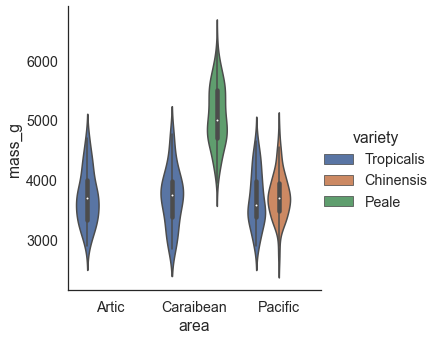

In [11]:
sns.catplot(x="area", y="mass_g", hue ="variety", kind="violin",  data = df)

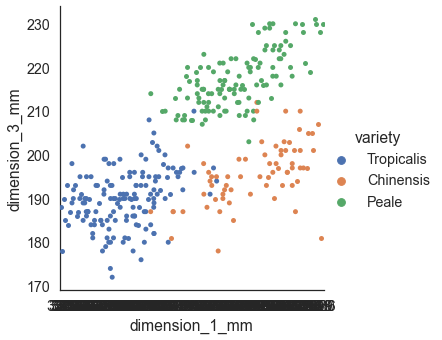

In [12]:
sns.catplot(x="dimension_1_mm", y="dimension_3_mm", hue ="variety",  data = df)

On peut bien distinguer les trois variety, cela annonce des resultats assez haut

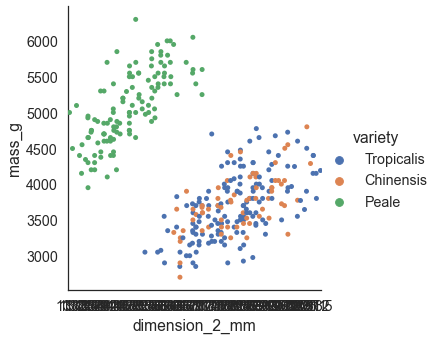

In [13]:
sns.catplot(x="dimension_2_mm", y="mass_g", hue ="variety",  data = df)

On peut voir les groupe qui se dissocie

# Preprocess

Commencons par encodre le sex pour gérer ses valeur null ensuite, gérer manuellement car python prend les null pour des float

In [14]:
def encodageSex(df):
  code = {'MALE':0, 'FEMALE':1}
  df['sex'] = df['sex'].map(code)
  return df
encodageSex(df)

,variety,area,dimension_1_mm,dimension_2_mm,dimension_3_mm,mass_g,sex
0,Tropicalis,Artic,39.1,18.7,181.0,3750.0,0.0
1,Tropicalis,Artic,39.5,17.4,186.0,3800.0,1.0
2,Tropicalis,Artic,40.3,18.0,195.0,3250.0,1.0
3,Tropicalis,Artic,NaN,NaN,NaN,NaN,NaN
4,Tropicalis,Artic,36.7,19.3,193.0,3450.0,1.0
...,...,...,...,...,...,...,...
339,Peale,Caraibean,NaN,NaN,NaN,NaN,NaN
340,Peale,Caraibean,46.8,14.3,215.0,4850.0,1.0
341,Peale,Caraibean,50.4,15.7,222.0,5750.0,0.0
342,Peale,Caraibean,45.2,14.8,212.0,5200.0,1.0


In [15]:
df[df.isnull().any(axis=1)]

,variety,area,dimension_1_mm,dimension_2_mm,dimension_3_mm,mass_g,sex
3,Tropicalis,Artic,NaN,NaN,NaN,NaN,NaN
8,Tropicalis,Artic,34.1,18.1,193.0,3475.0,NaN
9,Tropicalis,Artic,42.0,20.2,190.0,4250.0,NaN
10,Tropicalis,Artic,37.8,17.1,186.0,3300.0,NaN
11,Tropicalis,Artic,37.8,17.3,180.0,3700.0,NaN
47,Tropicalis,Pacific,37.5,18.9,179.0,2975.0,NaN
246,Peale,Caraibean,44.5,14.3,216.0,4100.0,NaN
286,Peale,Caraibean,46.2,14.4,214.0,4650.0,NaN
324,Peale,Caraibean,47.3,13.8,216.0,4725.0,NaN
336,Peale,Caraibean,44.5,15.7,217.0,4875.0,NaN


Le sex pourrais être déterminé par des spécimen similaire, utilisons le KNNI Encoder (1 voisin, pour ne pas avoir de valeur calculer dans la colonne 'sex')

In [16]:
from sklearn.impute import KNNImputer
imputerKnni = KNNImputer( missing_values=np.nan, n_neighbors=1)
dfn = imputerKnni.fit_transform(df[['dimension_1_mm', 'dimension_2_mm', 'dimension_3_mm', 'mass_g','sex']])

In [17]:
df['sex'] = pd.Series(dfn[:,4])

In [18]:
pd.Series(dfn[:,4])

0      0.000000
1      1.000000
2      1.000000
3      0.495495
4      1.000000
         ...   
339    0.495495
340    1.000000
341    0.000000
342    1.000000
343    0.000000
Length: 344, dtype: float64

Vérifions les valeur null et visualisons le sex

In [19]:
df = df[df.mass_g.notnull()]

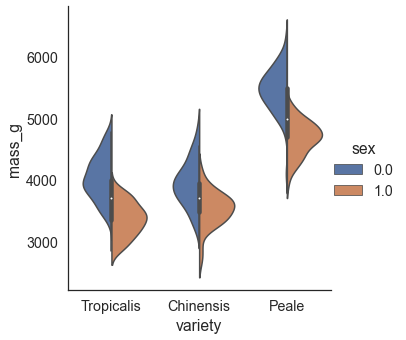

In [20]:
sns.catplot(x="variety", y="mass_g", hue ="sex", kind="violin", split = True,  data = df)

## Normalisation

In [21]:
# Define features data (X)
X = df[['area','dimension_1_mm', 'dimension_2_mm', 'dimension_3_mm', 'mass_g','sex']]
# Define target data (y)
y = df['variety']

Encodage de y

In [22]:
from sklearn.preprocessing import LabelEncoder
label_encody = LabelEncoder()
yNor =label_encody.fit_transform(y)
yNor = pd.Series(yNor)

Suite à l'EDA, le standart scaler seras mieux, il ne semble pas d'y avoir d'oulier individuel qui ne fasse pas de sens

In [23]:
X.describe()

,dimension_1_mm,dimension_2_mm,dimension_3_mm,mass_g,sex
count,342.000000,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386,0.500000
std,5.459584,1.974793,14.061714,801.954536,0.500733
min,32.100000,13.100000,172.000000,2700.000000,0.000000
25%,39.225000,15.600000,190.000000,3550.000000,0.000000
50%,44.450000,17.300000,197.000000,4050.000000,0.500000
75%,48.500000,18.700000,213.000000,4750.000000,1.000000
max,59.600000,21.500000,231.000000,6300.000000,1.000000


In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler

NormalisationX = ColumnTransformer(
    transformers=[
        (
        'data_area',
         OneHotEncoder(handle_unknown='ignore'),
         ['area']
         ),
         (
        'data_num',
         StandardScaler(),
         ['dimension_1_mm', 'dimension_2_mm', 'dimension_3_mm', 'mass_g']
        )
    ])

On construira le pipelin aux choix du model

In [25]:
XNor =NormalisationX.fit_transform(X)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(XNor, yNor, test_size=0.25, random_state=37)


# Model training

Pycaret permet de comparer les modeles

In [27]:
from pycaret.classification import *
testpy = setup(data = df, target = 'variety', session_id=123) 


,Description,Value
0,session_id,123
1,Target,variety
2,Target Type,Multiclass
3,Label Encoded,"Chinensis: 0, Peale: 1, Tropicalis: 2"
4,Original Data,"(342, 7)"
5,Missing Values,0
6,Numeric Features,4
7,Categorical Features,2
8,Ordinal Features,0
9,High Cardinality Features,0


In [28]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0310
ridge,Ridge Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0100
lda,Linear Discriminant Analysis,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0170
et,Extra Trees Classifier,0.9958,1.0000,0.9970,0.9965,0.9959,0.9935,0.9938,0.2080
rf,Random Forest Classifier,0.9957,1.0000,0.9967,0.9965,0.9958,0.9932,0.9935,0.2150
lightgbm,Light Gradient Boosting Machine,0.9957,1.0000,0.9967,0.9965,0.9958,0.9932,0.9935,0.0630
gbc,Gradient Boosting Classifier,0.9915,1.0000,0.9936,0.9930,0.9917,0.9867,0.9873,0.2500
dt,Decision Tree Classifier,0.9707,0.9794,0.9717,0.9741,0.9710,0.9537,0.9551,0.0110
ada,Ada Boost Classifier,0.9621,0.9919,0.9708,0.9695,0.9634,0.9409,0.9432,0.1070
nb,Naive Bayes,0.8534,0.9990,0.8915,0.9209,0.8587,0.7824,0.8103,0.0110


In [29]:
print(best_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Les modeles suivant ont d'excellente performance; Logistuc Regression, Linear Discriminant Analysis et le ridge classifier. Je vais les refaire tourné avec ma noramlisation. Le linear discriment semble le plus rapide il se désigne pour un choix finale. La métrics choisit sera l'accuracy, cela nous permet de voir si on atteinds vraiment les 100%


In [30]:
def classifiertest(classifier, X, y, testset_size=0.25):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testset_size, random_state=37, stratify=y)
    classifier.fit(X_train, y_train)
    prediction = classifier.predict(X_test)
    # Compute the accuracy (in %)
    accuracy = accuracy_score(y_test, prediction)*100
    #La cross validation
    scores = cross_validate(classifier, X, y)
    #print('Precision on cross Validation '+ scores[ accuracy_score])
    # Let's see the global performance
    print('Precision of our model is equal ' + str(round(accuracy, 2)) + ' %.')
    plot_confusion_matrix(classifier, X_test, y_test,
                                 cmap=plt.cm.summer, # other color palettes : https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
                                 normalize=None)


Precision of our model is equal 100.0 %.


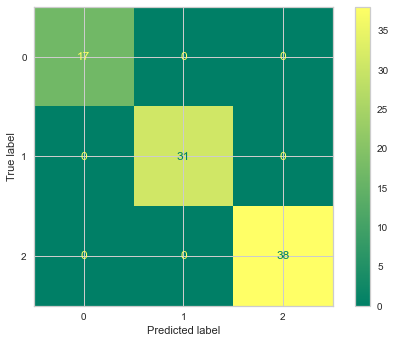

In [31]:
from sklearn.linear_model import LogisticRegression
pycaretChampion = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
classifiertest(pycaretChampion, XNor, yNor)


Precision of our model is equal 100.0 %.


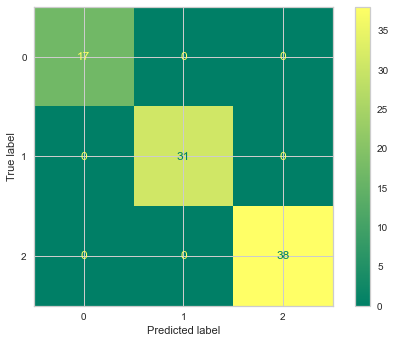

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
linearDis = LinearDiscriminantAnalysis(solver ='lsqr')
classifiertest(linearDis, XNor, yNor)

En changeant la side de train test split on peut voir à certain moment une valeur mal prédict. Mais comme on as pus l'observer dans l'EDA, la variety Peal est facilement distingable. CHinensie et tropical sont proche mais on as pus voir que la dimension_1_mm peut les séparer.

In [33]:
endPipe = Pipeline(steps=[('preparation', NormalisationX),
                        ('model',linearDis)])
endPipe

Pipeline(memory=None,
         steps=[('preparation',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('data_area',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='ignore',
                                                                sparse=True),
                                                  ['area']),
                                                 ('data_num',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,

# Conclusion

Les performance sont bonne, un peu trop. Mais le modele est simple donc ca peut se justifier, des analyse plus en profondeur pourrait garantir un meilleur entrainnement (Cross Validation et voir l'importance des métric pour les modeles). 
Le projet s'est bien déroulé sauf sur certain point;
La gestions des valeur null de la colonne sex pris plus de temps que prévus, la colonne étant catégorique et la méthode choisit fut le Knni car on s'est douté d'un différence dans les mesure entre sex. On ne pouvait pas traiter chaque valeur null de la même facons. 
Ensuite, ce retard ne m'as pas permit d'implementer les option cité plus haut. Et la tentative de validation croisé ne fut pas fluide. Le fait d'avoir des resultats à 100% ne nous aide pas car il n'indique pas clairement les problemes du modele.
Et aussi, du fait des performance à 100%, on n'as pas vraiment l'occasion de pouvoir les améliorers sans faire des implémentation plus complete.